# NumPy
NumPy is the foundation of the Python machine learning stack. NumPy allows for
efficient operations on the data structures often used in machine learning: vectors,
matrices, and tensors. While NumPy is not the focus of this book, it will show up fre‐
quently throughout the following chapters. This chapter covers the most common
NumPy operations we are likely to run into while working on machine learning
workflows.

In [11]:
import numpy as np
from scipy import sparse

## creating some most used structures & Some linear algebra properties

In [21]:
vector = np.array([1,2,3,4,5,6])
column_vector = np.array([[1], [2], [3], [4], [5]])
matrix = np.array([[1, 2, 3],
                         [4, 5, 6],
                         [7, 8, 9]])
# array matrix is used widely more than mat matrix 
mat_matrix = np.mat([[1, 2, 3],
                     [4, 5, 6],
                     [7, 8, 9]])
# sparse matrix is used to only save non-zero values in large datasets with lots of zeros
before_sparse = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [3, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
# compressed sparse row
sparse_matrix = sparse.csr_matrix(before_sparse)
print("Matrix shape is " + str(matrix.shape)) # (3,3)
print("Matrix size is " + str(matrix.size)) # 12
print("Matrix dimensions is " + str(matrix.ndim)) # 2
# data selection
vector[:] # all vector elements
vector[:3] # elements 0, 1, 2
vector[-1] # last elements
vector[3:] # from 3 to the end
matrix[:, 0:2] # columns 0, 1
matrix[1:2, :] # row 1
# functoins performing on element wise level
add100 = lambda i:i+100
vectorized_add100 = np.vectorize(add100)
matrix100 = vectorized_add100(matrix) # we can use matrix+100 instead
print("Maximum element in matrix is " + str(np.max(matrix)))
print("Minimum element in matrix is " + str(np.min(matrix)))
print("Maximum element in matrix rows is " + str(np.max(matrix, axis=1)))
print("Maximum element in matrix columns is " + str(np.max(matrix, axis=0)))
print("Mean of matrix is " + str(np.mean(matrix)))
print("Variance of matrix is " + str(np.var(matrix)))
print("Srandard deviation of matrix is " + str(np.std(matrix)))
print("Matrix transpose is " + str(matrix.T))
resized_matrix = np.resize(matrix, (1, -1)) # one row any number of columns
flatenned_matrix = matrix.flatten() # equals np.resize(1, -1)
# Linear algebra properties
rank = np.linalg.matrix_rank(matrix)
determinant = np.linalg.det(matrix)
inverse = np.linalg.inv(matrix)
diagonal = matrix.diagonal()
trace = matrix.trace() # equals sum(matrix.diagonal())
eigenvalues, eigenvectors = np.linalg.eig(matrix)
mat_a = np.array([[1, 2], [3, 4]])
mat_b = np.array([[5, 6], [7, 8]])
multi = np.dot(mat_a, mat_b) # equals np.multi(mat_a, mat_b) equals mat_a @ mat_b
element_multi = mat_a * mat_b
np.random.seed(0)
random_matrix = np.random.random((3,4))
random_int = np.random.randint(1, 11, 3) # 3 elements needed
uniform_dis = np.random.uniform(1, 10, 5) # 5 elements needed
normal_rand = np.random.normal(0.0, 1.0, 3) # 3 elements needed randomly from 0 mean 1 std normal distribution

Matrix shape is (3, 3)
Matrix size is 9
Matrix dimensions is 2
Maximum element in matrix is 9
Minimum element in matrix is 1
Maximum element in matrix rows is [3 6 9]
Maximum element in matrix columns is [7 8 9]
Mean of matrix is 5.0
Variance of matrix is 6.666666666666667
Srandard deviation of matrix is 2.581988897471611
Matrix transpose is [[1 4 7]
 [2 5 8]
 [3 6 9]]


## Loading datasets
Often we do not want to go through the work of loading, transforming, and cleaning
a real-world dataset before we can explore some machine learning algorithm or
method. Luckily, scikit-learn comes with some common datasets we can quickly load.
These datasets are often called “toy” datasets because they are far smaller and cleaner
than a dataset we would see in the real world. Some popular sample datasets in scikitlearn are:
load_boston
Contains 503 observations on Boston housing prices. It is a good dataset for
exploring regression algorithms.
load_iris
Contains 150 observations on the measurements of Iris flowers. It is a good data‐
set for exploring classification algorithms.
load_digits
Contains 1,797 observations from images of handwritten digits. It is a good data‐
set for teaching image classification.

In [2]:
from sklearn import datasets
digits = datasets.load_digits()
features = digits.data
target = digits.target
features[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

## Creating simulated datasets
scikit-learn offers many methods for creating simulated data. Of those, three methods
are particularly useful.
When we want a dataset designed to be used with linear regression, make_regression
is a good choice. If we are interested in creating a simulated dataset for classification, we can use
make_classification. Finally, if we want a dataset designed to work well with clustering techniques, scikitlearn offers make_blobs

In [3]:
from sklearn.datasets import make_regression
features, target, coefficients = make_regression(n_samples=100, 
                                               n_features=5,
                                               n_informative=3, 
                                               n_targets=1,
                                               noise=0.0,
                                               coef=True,
                                               random_state=1)
print('Feature Matrix\n', features[:3])
print('Target Vector\n', target[:3])

Feature Matrix
 [[ 0.19829972 -0.20075807  0.18656139 -0.22232814  0.41005165]
 [-1.09491185  1.2245077   0.40349164 -0.44712856  0.59357852]
 [-1.89636092  0.98633519  0.2135339  -0.17470316  2.19069973]]
Target Vector
 [ 3.35625132 20.59244372 14.7538029 ]


In [4]:
from sklearn.datasets import make_classification
features, target = make_classification(n_samples = 100,
                                     n_features = 3,
                                     n_informative = 3,
                                     n_redundant = 0,
                                     n_classes = 2,
                                     weights = [.25, .75],
                                     random_state = 1)
# View feature matrix and target vector
print('Feature Matrix\n', features[:3])
print('Target Vector\n', target[:3])

Feature Matrix
 [[ 1.06354768 -1.42632219  1.02163151]
 [ 0.23156977  1.49535261  0.33251578]
 [ 0.15972951  0.83533515 -0.40869554]]
Target Vector
 [1 0 0]


In [5]:
from sklearn.datasets import make_blobs
features, target = make_blobs(n_samples = 100,
                             n_features = 2,
                             centers = 3,
                             cluster_std = 0.5,
                             shuffle = True,
                             random_state = 1)
# View feature matrix and target vector
print('Feature Matrix\n', features[:3])
print('Target Vector\n', target[:3])

Feature Matrix
 [[ -1.22685609   3.25572052]
 [ -9.57463218  -4.38310652]
 [-10.71976941  -4.20558148]]
Target Vector
 [0 1 1]


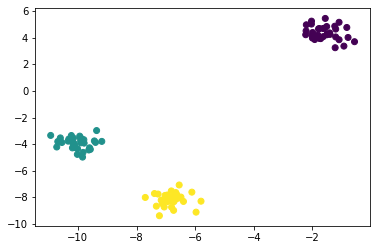

In [8]:
from matplotlib import pyplot as plt
plt.scatter(features[:, 0], features[:, 1], c=target)
plt.show()

As might be apparent from the solutions, make_regression returns a feature matrix
of float values and a target vector of float values, while make_classification and
make_blobs return a feature matrix of float values and a target vector of integers rep‐
resenting membership in a class.
scikit-learn’s simulated datasets offer extensive options to control the type of data
generated. scikit-learn’s documentation contains a full description of all the parame‐
ters, but a few are worth noting.
In make_regression and make_classification, n_informative determines the
number of features that are used to generate the target vector. If n_informative is less
than the total number of features (n_features), the resulting dataset will have redun‐
dant features that can be identified through feature selection techniques.
In addition, make_classification contains a weights parameter that allows us to
simulate datasets with imbalanced classes. For example, weights = [.25, .75]
would return a dataset with 25% of observations belonging to one class and 75% of
observations belonging to a second class.

# Data wrangling
Data wrangling is a broad term used, often informally, to describe the process of
transforming raw data to a clean and organized format ready for use. For us, data
wrangling is only one step in preprocessing our data, but it is an important step.
The most common data structure used to “wrangle” data is the data frame, which can
be both intuitive and incredibly versatile. Data frames are tabular, meaning that they
are based on rows and columns like you would see in a spreadsheet.

In [39]:
import pandas as pd

df = pd.read_csv('data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
print(df.shape)
df.describe()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [22]:
df.iloc[0:2] # first 2 row

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [31]:
df['sex'].replace([0, 1], ['female', 'male'], inplace=True)

In [33]:
df[df['sex'] == 'male'].head(5) # conditional selection of rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,male,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44,male,1,120,263,0,1,173,0,0.0,2,0,3,1


In [34]:
df[(df['sex'] == 'female') & (df['age'] > 50)].head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,female,1,140,294,0,0,153,0,1.3,1,0,2,1
14,58,female,3,150,283,1,0,162,0,1.0,2,0,2,1
16,58,female,2,120,340,0,1,172,0,0.0,2,0,2,1
17,66,female,3,150,226,0,1,114,0,2.6,0,0,2,1


In [35]:
df['sex'].value_counts()

male      207
female     96
Name: sex, dtype: int64

In [36]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [37]:
df.count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [38]:
#  Load data, set missing values
# dataframe = pd.read_csv(url, na_values=[np.nan, 'NONE', -999])
################################################################
# import numpy as np
# Replace values with NaN
# dataframe['Sex'] = dataframe['Sex'].replace('male', np.nan)

In [42]:
df.drop(['ca', 'thal'], axis=1).head() # droping columns

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,63,1,3,145,233,1,0,150,0,2.3,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,1


In [43]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [44]:
# Drop duplicates, show first two rows of output
df.drop_duplicates().head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [51]:
# Drop duplicates depending on specific columns
df.drop_duplicates(subset=['sex']).shape

(2, 14)

In [58]:
df.groupby('sex').mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.12500,0.572917,151.125000,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.758454,0.932367,130.946860,239.289855,0.15942,0.507246,148.961353,0.371981,1.115459,1.386473,0.811594,2.400966,0.449275


In [69]:
df.groupby(['sex', 'target'])['age'].mean()

sex     target
female  0         59.041667
        1         54.555556
male    0         56.087719
        1         50.903226
Name: age, dtype: float64

In [68]:
# applying a function over a column
def txtize(x):
    if x == 0:
        return 'female'
    else:
        return 'male'
df['sex'] = df['sex'].apply(txtize)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1


# Handling Numerical Data
Quantitative data is the measurement of something—whether class size, monthly
sales, or student scores. The natural way to represent these quantities is numerically
(e.g., 29 students, $529,392 in sales). In this chapter, we will cover numerous strate‐
gies for transforming raw numerical data into features purpose-built for machine
learning algorithms.

In [73]:
data = pd.read_csv('housing.csv')
data.columns = ['Area', 'Number_of_rooms', 'Price']
data.head()

,Area,Number_of_rooms,Price
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


## Features rescaling
Rescaling is a common preprocessing task in machine learning. Many of the algo‐
rithms described later in this book will assume all features are on the same scale, typi‐
cally 0 to 1 or –1 to 1. There are a number of rescaling techniques, but one of the
simplest is called min-max scaling. Min-max scaling uses the minimum and maxi‐
mum values of a feature to rescale values to within a range. Specifically, min-max cal‐
culates:

xi'= (xi − min x)/(max x − min x)

In [77]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(data)
rescaled_features[:10] # numpy array

array([[0.20628792, 0.5       , 0.30188679],
       [0.42691671, 0.5       , 0.37566038],
       [0.1555433 , 0.25      , 0.11716981],
       [0.59238831, 0.75      , 0.69811321],
       [0.31246553, 0.75      , 0.24528302],
       [0.18808605, 0.5       , 0.27358491],
       [0.15857694, 0.5       , 0.05490377],
       [0.145615  , 0.5       , 0.07943396],
       [0.17705461, 0.5       , 0.13698113],
       [0.30005516, 0.75      , 0.13226226]])

In [80]:
# creating a dataframe out of a numpy array
gg = pd.DataFrame(rescaled_features)
gg.columns = ['Area', 'Number_of_rooms', 'Price']
gg.head()

,Area,Number_of_rooms,Price
0,0.206288,0.50,0.301887
1,0.426917,0.50,0.375660
2,0.155543,0.25,0.117170
3,0.592388,0.75,0.698113
4,0.312466,0.75,0.245283


## Standardization
A common alternative to min-max scaling is rescaling of fea‐
tures to be approximately standard normally distributed. To achieve this, we use
standardization to transform the data such that it has a mean, x̄, of 0 and a standard
deviation, σ, of 1. Specifically, each element in the feature is transformed so that:

xi' = (xi − x)/σ

In [95]:
standardizer = preprocessing.StandardScaler()
standardized_data = standardizer.fit_transform(data)
print(standardized_data[:10])
print("Mean is " + str(round(standardized_data.mean())))
print("Standard Deviation is " + str(round(standardized_data.std())))

[[-0.50145768 -0.22866478 -0.07391816]
 [ 0.50539755 -0.22866478  0.23957103]
 [-0.73303438 -1.54348727 -0.85884375]
 [ 1.26053896  1.08615771  1.60978333]
 [-0.0169086   1.08615771 -0.31444694]
 [-0.58452323 -0.22866478 -0.19418255]
 [-0.71919012 -0.22866478 -1.12343343]
 [-0.77834286 -0.22866478 -1.01919627]
 [-0.634866   -0.22866478 -0.77465868]
 [-0.07354421  1.08615771 -0.79471076]]
Mean is 0.0
Standard Deviation is 1.0


## Normalization 
Many rescaling methods (e.g., min-max scaling and standardization) operate on fea‐
tures; however, we can also rescale across individual observations. Normalizer
rescales the values on individual observations to have unit norm (the sum of their
lengths is 1). This type of rescaling is often used when we have many equivalent fea‐
tures (e.g., text classification when every word or n-word group is a feature).
Normalizer provides three norm options with Euclidean norm (often called L2)
being the default argument:

||x'|| = sqr(x1^2+x2^2+x3^2)

Alternatively, we can specify Manhattan norm (L1):

||x'|| = ∑(i=1>n) |xi|   # sum = 1

In [100]:
l2_norm_featu = preprocessing.Normalizer(norm="l2").transform(rescaled_features)
l1_norm_featu = preprocessing.Normalizer(norm="l1").transform(rescaled_features)
print("L2 NORMALIZER")
print(l2_norm_featu[:10])
print("L1 NORMALIZER")
print(l1_norm_featu[:10])

L2 NORMALIZER
[[0.33303001 0.80719706 0.48736426]
 [0.56379655 0.66031211 0.4961062 ]
 [0.49083534 0.78890468 0.36974325]
 [0.50051902 0.63368784 0.5898478 ]
 [0.36816785 0.88370033 0.28900891]
 [0.3133788  0.83307297 0.45583238]
 [0.30067123 0.94802945 0.10410079]
 [0.27641657 0.94913494 0.1507871 ]
 [0.32319559 0.91270033 0.25004545]
 [0.3665685  0.91625278 0.16158089]]
L1 NORMALIZER
[[0.20461525 0.49594579 0.29943896]
 [0.32774775 0.38385444 0.28839781]
 [0.29756916 0.47827383 0.22415702]
 [0.29031505 0.3675567  0.34212825]
 [0.23893395 0.57350475 0.1875613 ]
 [0.19558254 0.51992836 0.2844891 ]
 [0.22225821 0.70078979 0.07695201]
 [0.20083472 0.6896086  0.10955669]
 [0.21750225 0.61422365 0.1682741 ]
 [0.25378562 0.63434742 0.11186697]]


# Generating Polynomial and Interaction features
Polynomial features are often created when we want to include the notion that there
exists a nonlinear relationship between the features and the target. For example, we
might suspect that the effect of age on the probability of having a major medical con‐
dition is not constant over time but increases as age increases. We can encode that
nonconstant effect in a feature, x, by generating that feature’s higher-order forms (x2,x3, etc.).
Additionally, often we run into situations where the effect of one feature is dependent
on another feature. A simple example would be if we were trying to predict whether
or not our coffee was sweet and we had two features: 1) whether or not the coffee was
stirred and 2) if we added sugar. Individually, each feature does not predict coffee
sweetness, but the combination of their effects does. That is, a coffee would only be
sweet if the coffee had sugar and was stirred. The effects of each feature on the target
(sweetness) are dependent on each other. We can encode that relationship by includ‐
ing an interaction feature that is the product of the individual features.
The degree parameter determines the maximum degree of the polynomial. For
example, degree=2 will create new features raised to the second power:

x1, x2, x1^2, x2^2

while degree=3 will create new features raised to the second and third power:

x1, x2, x1^2, x2^2, x1^3, x2^3

Furthermore, by default PolynomialFeatures includes interaction features:

x1x2

We can restrict the features created to only interaction features by setting interac

tion_only to True.

In [108]:
import numpy as np
features = np.array([[1,2],
                    [2,3],
                    [3,4]])
poly_features = preprocessing.PolynomialFeatures(degree=2, include_bias=False).fit_transform(features)
poly_features

array([[ 1.,  2.,  1.,  2.,  4.],
       [ 2.,  3.,  4.,  6.,  9.],
       [ 3.,  4.,  9., 12., 16.]])

In [109]:
# to only generate interaction terms like x1x2
interaction = preprocessing.PolynomialFeatures(degree=2,interaction_only=True, include_bias=False).fit_transform(features)
interaction

array([[ 1.,  2.,  2.],
       [ 2.,  3.,  6.],
       [ 3.,  4., 12.]])